In [1]:
import os
import glob
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mesa_reader import MesaData
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import interact


In [2]:

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.6*fs,
          'axes.labelsize': 0.8*fs,
          'axes.titlesize': 0.8*fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'lines.linestyle':"--",
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)


In [5]:
# Define the directory path where the files are located
directory_path=[]

#directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_011_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
#directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_095_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
#directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_085_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_064_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
#directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_050_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')


# Here I plot rho-T diagram for profiles

/tmp/ipykernel_2777173/4246517742.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('copper')


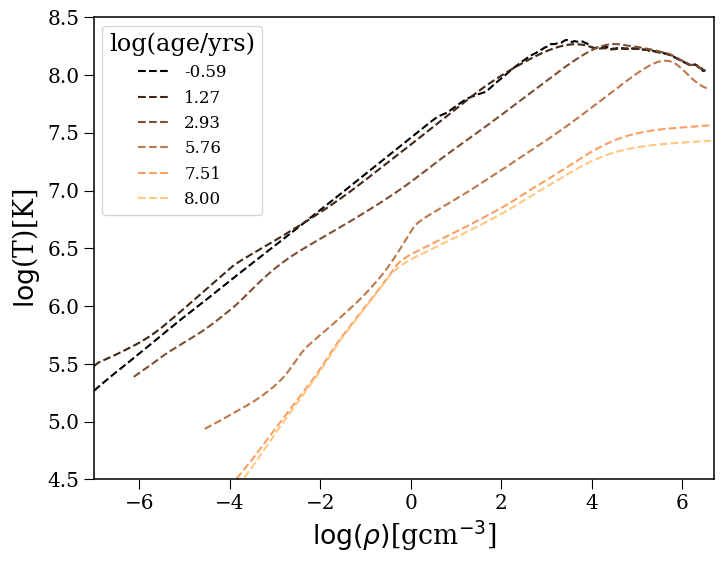

In [11]:
import matplotlib.cm as cm
colormap=cm.get_cmap('copper')
i=0
j=0
temp=[]
rho=[]
plt.rcParams['legend.title_fontsize'] = 'xx-large'
j=0
for directory in directory_path:

    file_pattern = os.path.join(directory, 'profile*.data')
    data_files = glob.glob(file_pattern)
    fig=plt.figure(figsize=(8,6))
    labels=[]
    for i,data in enumerate(data_files):
        h = MesaData(data)
        #temp.append(h.logT)
        #rho.append(h.logRho)
        color=colormap(j/(len(data_files)-17))
        
        if h.star_age>=1e-1 and h.star_age<1e0:
            if i%3==0:
                plot1=plt.plot(h.logRho,h.logT,color=color)
                labels.append("{:.2f}".format(np.log10(h.star_age)))
                j+=1
        
        elif h.star_age>=1e1:
                plot1=plt.plot(h.logRho,h.logT,color=color)
                labels.append("{:.2f}".format(np.log10(h.star_age)))
                j+=1
        
    plt.ylabel(r'$\mathrm{log}$(T)[K]')
    plt.xlabel(r'$\mathrm{log}(\rho)$[gcm$^{-3}$]')
    plt.legend(labels,title="log(age/yrs)",fontsize=12)
    plt.xlim(-7,6.7)
    plt.ylim(4.5,9)
    #plt.show()

        
    #print(temp)
    i=i+1
    #else:
    #h = MesaData(os.path.join(directory, 'profile3.data'))
    
    
    


#plt.axvline(x=0.623,color='black',linestyle='--')
plt.ylim(4.5,8.5)

#plt.xlim(2,8)
plt.savefig("../../../D6_MESA/Plots/plots_paper/rho_T_064_grid2.pdf",bbox_inches='tight')
plt.savefig("../../../D6_MESA/Plots/plots_paper/rho_T_064_grid2.png")

In [35]:
from scipy.interpolate import interp1d

def create_interpolation_function(original_m, original_quantity):
    interpolation_function = interp1d(original_m, original_quantity, kind='linear', fill_value="extrapolate")
    return interpolation_function
